### TODOs:

- Train and test on all subjects, randomizing the data
- Train on myself and test on myself
- Train on myself and test on others
- Train on others and test on themselves
- Train on others and test on others

- After assessing all of these, do a hyperparameter search to get best model

- See if any of this generalizes to other subjects (big one)

- diagrams for the data loading and explanation of the LSTMs (draw.io)

### NTHs: 

- Investigate the strength of the Aaronson Oracle, best window_size, etc.

### Setup

In [1]:
import os, sys
from pprint import pprint
import matplotlib.pyplot as plt
plt.style.use('ggplot')

for module in ['actions', 'models']:
    path = os.path.join(os.getcwd(), '..', module)
    sys.path.append(os.path.abspath(path))

from oracle import oracle
from randomness import test_randomness
from load_data import load_data, prune
from lstm_vary import LSTM_Vary, train_vary
from lstm_fixed import LSTM_Fixed, train_fixed

### Load Data

In [2]:
train_data, eval_data, test_data = load_data()

### Aaronson Oracle Results (Baseline)

In [3]:
all_trials = train_data + eval_data + test_data

sorted_trials_by_length = sorted(all_trials, key=len)

sorted_trials_by_ac_value = sorted(all_trials, key=lambda x: test_randomness(x)['autocorrelation'])

sorted_trials_by_chi_value = sorted(all_trials, key=lambda x: test_randomness(x)['chi2_pvalue'])

sorted_trials_by_mkv_value = sorted(all_trials, key=lambda x: test_randomness(x)['markov_kldg'])

sorted_trials_by_runs_value = sorted(all_trials, key=lambda x: test_randomness(x)['runs_pvalue'])

In [4]:
lengths = []
ac_values = []
chi_values = []
mkv_values = []
runs_values = []

for i, t in enumerate(test_data):
    print(f'Trial {i+1}')
    
    length = len(t)
    lengths.append(length)
    print(f'Length: {length}')
    
    results = test_randomness(t)
    ac_values.append(results['autocorrelation'])
    chi_values.append(results['chi2_pvalue'])
    mkv_values.append(results['markov_kldg'])
    runs_values.append(results['runs_pvalue'])
    pprint(results)
    print('\n')

Trial 1
Length: 303
{'autocorrelation': -0.028728193746846112,
 'chi2_pvalue': 0.12087545165055069,
 'markov_kldg': 0.09267271682054506,
 'runs_pvalue': 4.104516862572245e-06}


Trial 2
Length: 276
{'autocorrelation': 0.028151090853897342,
 'chi2_pvalue': 0.3355039530729915,
 'markov_kldg': 0.014638315859673831,
 'runs_pvalue': 0.060095291237124204}


Trial 3
Length: 332
{'autocorrelation': -0.015480467482036697,
 'chi2_pvalue': 0.5101619380844786,
 'markov_kldg': 0.002151436451068172,
 'runs_pvalue': 0.5985395992100067}


Trial 4
Length: 204
{'autocorrelation': 0.04136220790536852,
 'chi2_pvalue': 0.12348527214454878,
 'markov_kldg': 0.019734518977599938,
 'runs_pvalue': 0.16335231981650078}


Trial 5
Length: 287
{'autocorrelation': -0.030309096941149145,
 'chi2_pvalue': 0.5952433298065473,
 'markov_kldg': 0.041399733110333514,
 'runs_pvalue': 0.0010673073166429094}


Trial 6
Length: 418
{'autocorrelation': -0.01473368634202969,
 'chi2_pvalue': 0.0017460270475651706,
 'markov_kldg': 0

In [5]:
results = oracle(test_data, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
accuracies = [round(results[r]['accuracy'], 2) for r in results]


Oracle (window 1)

trial 1 accuracy: 46.18%
trial 2 accuracy: 50.36%
trial 3 accuracy: 48.79%
trial 4 accuracy: 54.95%
trial 5 accuracy: 48.77%
trial 6 accuracy: 44.23%
trial 7 accuracy: 61.34%
trial 8 accuracy: 59.50%
trial 9 accuracy: 58.89%
trial 10 accuracy: 56.48%
trial 11 accuracy: 50.00%
trial 12 accuracy: 63.73%
trial 13 accuracy: 41.89%
trial 14 accuracy: 50.00%

Avg Accuracy: 52.51%


Oracle (window 2)

trial 1 accuracy: 52.33%
trial 2 accuracy: 53.11%
trial 3 accuracy: 55.02%
trial 4 accuracy: 55.72%
trial 5 accuracy: 51.76%
trial 6 accuracy: 57.11%
trial 7 accuracy: 57.84%
trial 8 accuracy: 63.07%
trial 9 accuracy: 59.22%
trial 10 accuracy: 59.80%
trial 11 accuracy: 47.87%
trial 12 accuracy: 67.30%
trial 13 accuracy: 55.35%
trial 14 accuracy: 59.39%

Avg Accuracy: 56.78%


Oracle (window 3)

trial 1 accuracy: 57.86%
trial 2 accuracy: 57.35%
trial 3 accuracy: 58.54%
trial 4 accuracy: 61.00%
trial 5 accuracy: 49.82%
trial 6 accuracy: 57.97%
trial 7 accuracy: 53.93%
trial 8 a

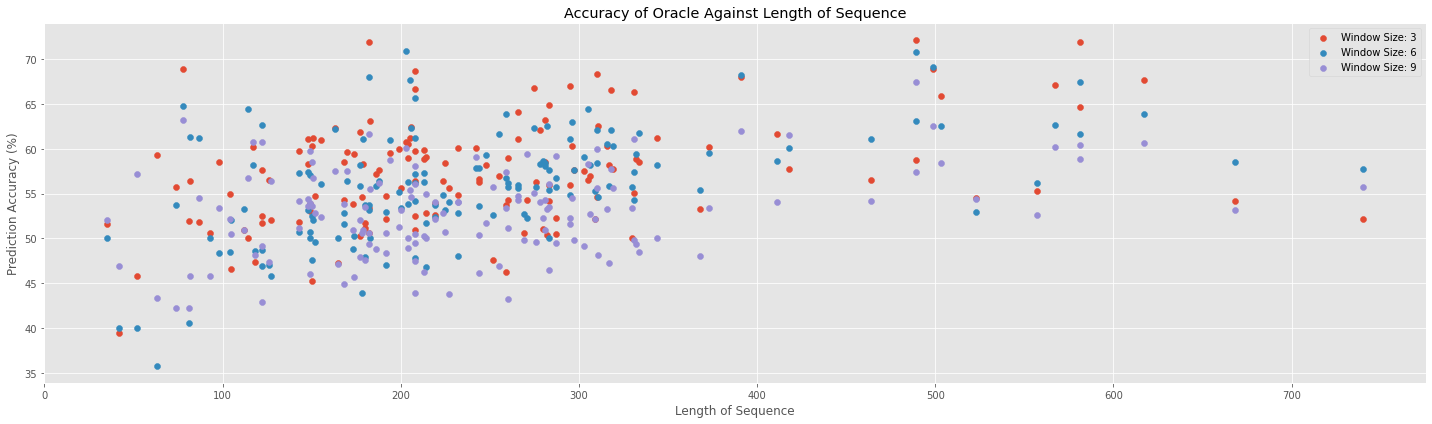

In [6]:
results = oracle(sorted_trials_by_length, [3, 6, 9], logging=False)
lengths = [len(trial) for trial in sorted_trials_by_length]

# set figure size
plt.figure(figsize=(20, 6))

for window in results:
    trial_accuracies = [results[window][t+1]['accuracies'][-1] for t in range(len(all_trials))]
    plt.scatter(lengths, trial_accuracies, label=f'Window Size: {window}')

plt.xlabel('Length of Sequence')
plt.ylabel('Prediction Accuracy (%)')
plt.title('Accuracy of Oracle Against Length of Sequence')
plt.legend()
plt.tight_layout()
plt.show()


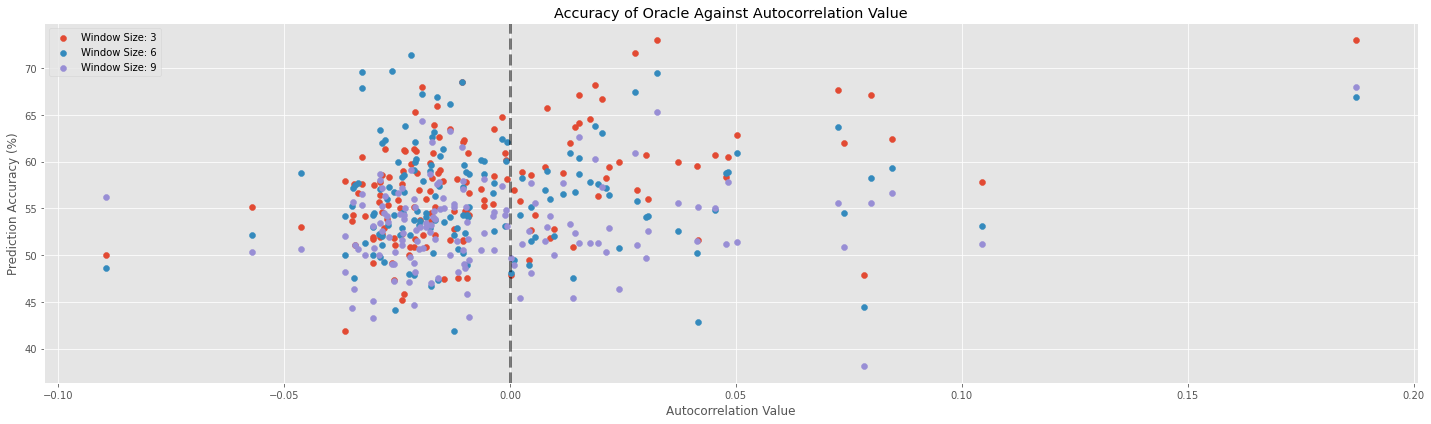

In [7]:
results = oracle(sorted_trials_by_ac_value, [3, 6, 9], logging=False)
ac_values = [test_randomness(trial)["autocorrelation"] for trial in sorted_trials_by_ac_value]

# set figure size
plt.figure(figsize=(20, 6))

for window in results:
    trial_accuracies = [results[window][t+1]['accuracies'][-1] for t in range(len(all_trials))]
    plt.scatter(ac_values, trial_accuracies, label=f'Window Size: {window}')

plt.xlabel('Autocorrelation Value')
# place a dotter line at 0 for reference
plt.axvline(x=0, color='k', linestyle='--', linewidth=3, alpha=0.5)

plt.ylabel('Prediction Accuracy (%)')
plt.title('Accuracy of Oracle Against Autocorrelation Value')
plt.legend()
plt.tight_layout()
plt.show()


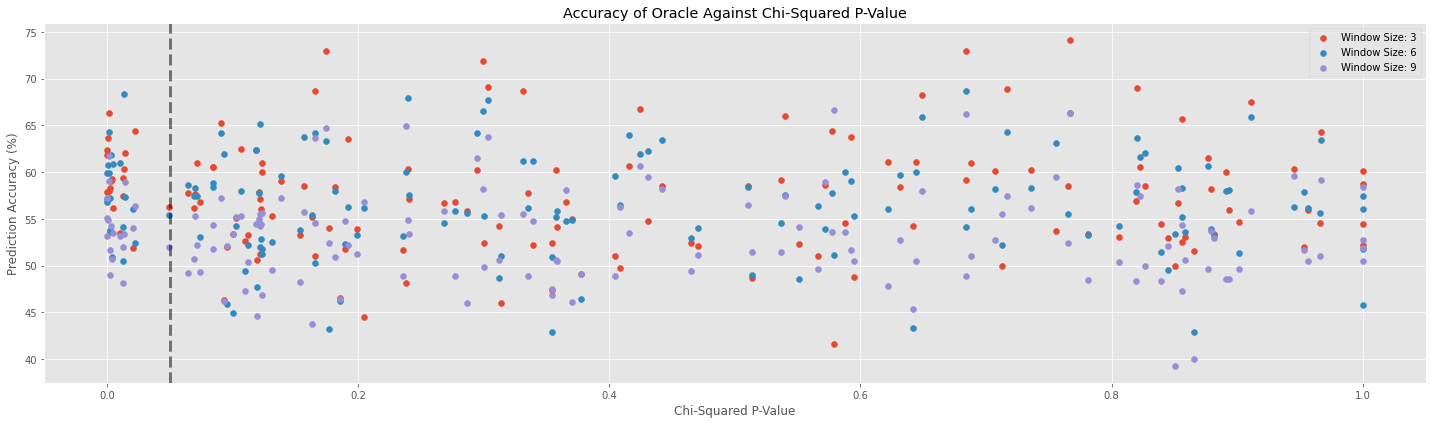

In [8]:
results = oracle(sorted_trials_by_chi_value, [3, 6, 9], logging=False)
chi_values = [test_randomness(trial)["chi2_pvalue"] for trial in sorted_trials_by_chi_value]

# set figure size
plt.figure(figsize=(20, 6))

for window in results:
    trial_accuracies = [results[window][t+1]['accuracies'][-1] for t in range(len(all_trials))]
    plt.scatter(chi_values, trial_accuracies, label=f'Window Size: {window}')

plt.xlabel('Chi-Squared P-Value')
# place a dotted line at p=0.05
plt.axvline(x=0.05, color='k', linestyle='--', linewidth=3, alpha=0.5)

plt.ylabel('Prediction Accuracy (%)')
plt.title('Accuracy of Oracle Against Chi-Squared P-Value')
plt.legend()
plt.tight_layout()
plt.show()


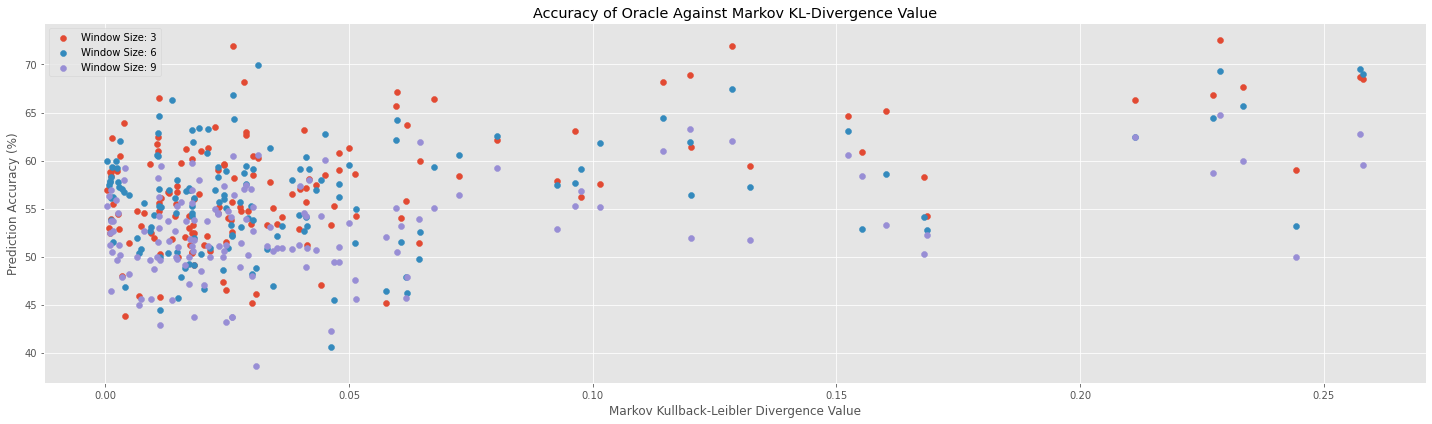

In [9]:
results = oracle(sorted_trials_by_mkv_value, [3, 6, 9], logging=False)
mkv_values = [test_randomness(trial)["markov_kldg"] for trial in sorted_trials_by_mkv_value]

# set figure size
plt.figure(figsize=(20, 6))

for window in results:
    trial_accuracies = [results[window][t+1]['accuracies'][-1] for t in range(len(all_trials))]
    plt.scatter(mkv_values, trial_accuracies, label=f'Window Size: {window}')

plt.xlabel('Markov Kullback-Leibler Divergence Value')
# place a dotter line at 0.5 for reference
# plt.axvline(x=0.5, color='k', linestyle='--', linewidth=3, alpha=0.5)

plt.ylabel('Prediction Accuracy (%)')
plt.title('Accuracy of Oracle Against Markov KL-Divergence Value')
plt.legend()
plt.tight_layout()
plt.show()

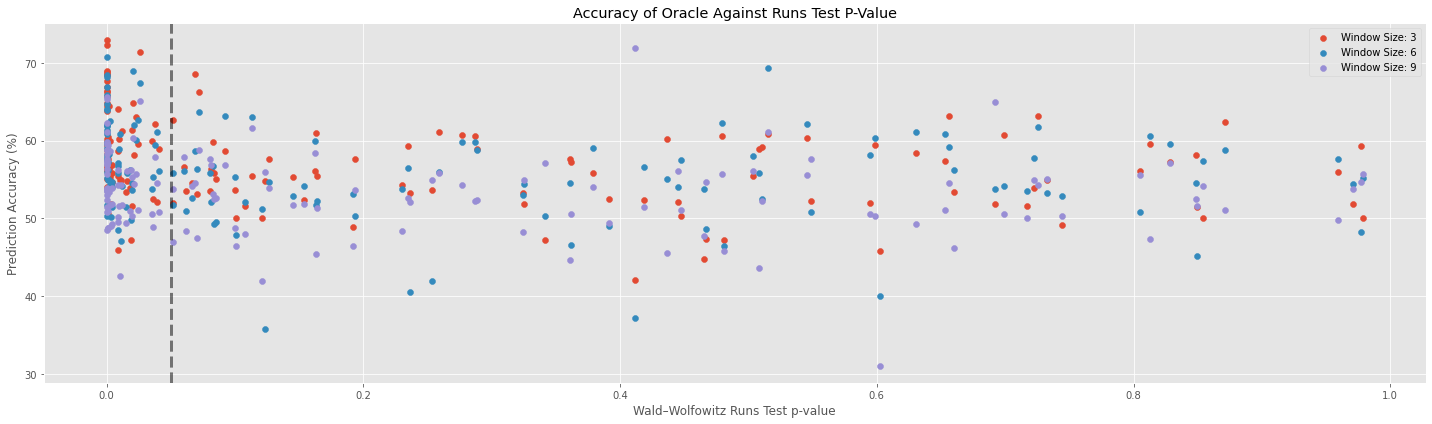

In [11]:
results = oracle(sorted_trials_by_runs_value, [3, 6, 9], logging=False)
runs_values = [test_randomness(trial)["runs_pvalue"] for trial in sorted_trials_by_runs_value]

# set figure size
plt.figure(figsize=(20, 6))

for window in results:
    trial_accuracies = [results[window][t+1]['accuracies'][-1] for t in range(len(all_trials))]
    plt.scatter(runs_values, trial_accuracies, label=f'Window Size: {window}')

plt.xlabel('Wald–Wolfowitz Runs Test p-value')
# place a dotted line at p=0.05
plt.axvline(x=0.05, color='k', linestyle='--', linewidth=3, alpha=0.5)
plt.ylabel('Prediction Accuracy (%)')
plt.title('Accuracy of Oracle Against Runs Test P-Value')
plt.legend()
plt.tight_layout()
plt.show()

### Train Variable LSTMs with just decision data

In [4]:
decision_train = prune(train_data, 'decision')
decision_eval = prune(eval_data, 'decision')
decision_test = prune(test_data, 'decision')

delay_train = prune(train_data, 'delay')
delay_eval = prune(eval_data, 'delay')
delay_test = prune(test_data, 'delay')

pupil_train = prune(train_data, 'pupil')
pupil_eval = prune(eval_data, 'pupil')
pupil_test = prune(test_data, 'pupil')

In [4]:
params = {
    'input_size': 1,
    'batch_size': 100,
    'hidden_size': 10,
    'num_stacked_layers': 1,
    'learning_rate': 0.01,
    'num_epochs': 1,
}

model_vary_decision = train_vary(
    decision_train, decision_eval, decision_test, params
)

0604-2147

{'batch_size': 100,
 'hidden_size': 5,
 'input_size': 1,
 'learning_rate': 0.01,
 'num_epochs': 1,
 'num_stacked_layers': 1}


batch 0 loss: 0.6924907565116882
batch 10 loss: 0.693958190354434
batch 20 loss: 0.6935800853229704
batch 30 loss: 0.6939523912245228
batch 40 loss: 0.6935839682090573
batch 50 loss: 0.6935965337005316
batch 60 loss: 0.6935143627104212
batch 70 loss: 0.6934595200377451
batch 80 loss: 0.6933345022024932
batch 90 loss: 0.6932328913238023
batch 100 loss: 0.6929923886119729
batch 110 loss: 0.6924734029683981
batch 120 loss: 0.6917403665455905
batch 130 loss: 0.6905399943126067
batch 140 loss: 0.6898713940424277
batch 150 loss: 0.6885402226290166
batch 160 loss: 0.6880489550762295
batch 170 loss: 0.6870353790054544
batch 180 loss: 0.6862019847111148
batch 190 loss: 0.6851452713861516
batch 200 loss: 0.684325265054086
batch 210 loss: 0.6837947902521251
batch 220 loss: 0.6830322265085591
batch 230 loss: 0.6823786912542401
batch 240 loss: 0.6813471589345655


In [5]:
params = {
    'input_size': 2,
    'batch_size': 100,
    'hidden_size': 10,
    'num_stacked_layers': 1,
    'learning_rate': 0.01,
    'num_epochs': 1,
}

model_vary_delay = train_vary(
    delay_train, delay_eval, delay_test, params
)

0604-2148

{'batch_size': 100,
 'hidden_size': 10,
 'input_size': 2,
 'learning_rate': 0.01,
 'num_epochs': 1,
 'num_stacked_layers': 1}


batch 0 loss: 0.7220571637153625
batch 10 loss: 0.699336051940918
batch 20 loss: 0.6969667559578305
batch 30 loss: 0.6957450489844045
batch 40 loss: 0.6949091844442414
batch 50 loss: 0.6944295378292308
batch 60 loss: 0.6941040617520692
batch 70 loss: 0.6939383896303849
batch 80 loss: 0.6938626810356423
batch 90 loss: 0.6943047328309698
batch 100 loss: 0.6941863817743735
batch 110 loss: 0.6941303218807187
batch 120 loss: 0.694045154516362
batch 130 loss: 0.6939170101216732
batch 140 loss: 0.6936793504877293
batch 150 loss: 0.6931689413178046
batch 160 loss: 0.6922696769607734
batch 170 loss: 0.6918739028144301
batch 180 loss: 0.6910162979726633
batch 190 loss: 0.6902641107898733
batch 200 loss: 0.6893037379677616
batch 210 loss: 0.6880453782623978
batch 220 loss: 0.6873732365634107
batch 230 loss: 0.6869110973366411
batch 240 loss: 0.686234518947443


In [6]:
params = {
    'input_size': 2,
    'batch_size': 100,
    'hidden_size': 10,
    'num_stacked_layers': 1,
    'learning_rate': 0.01,
    'num_epochs': 1,
}

model_vary_pupil = train_vary(
    pupil_train, pupil_eval, pupil_test, params
)

0604-2150

{'batch_size': 100,
 'hidden_size': 10,
 'input_size': 2,
 'learning_rate': 0.01,
 'num_epochs': 1,
 'num_stacked_layers': 1}


batch 0 loss: 0.693763017654419
batch 10 loss: 0.6939642862840132
batch 20 loss: 0.6938265448524839
batch 30 loss: 0.6936458214636771
batch 40 loss: 0.6936540778090314
batch 50 loss: 0.6933415730794271
batch 60 loss: 0.6927341437730633
batch 70 loss: 0.6915761324721323
batch 80 loss: 0.689423037899865
batch 90 loss: 0.6871167997737507
batch 100 loss: 0.686664097970075
batch 110 loss: 0.6852541963259379
batch 120 loss: 0.6833754935540444
batch 130 loss: 0.6821279475707134
batch 140 loss: 0.6807517438915605
batch 150 loss: 0.680621492941648
batch 160 loss: 0.6796171539318487
batch 170 loss: 0.6791641537906133
batch 180 loss: 0.6780538700562155
batch 190 loss: 0.6766315726709615
batch 200 loss: 0.6764479733225125
batch 210 loss: 0.6759420364953895
batch 220 loss: 0.675323699124798
batch 230 loss: 0.6750530407026216
batch 240 loss: 0.6741194366419464
ba

In [8]:
params = {
    'input_size': 3,
    'batch_size': 100,
    'hidden_size': 10,
    'num_stacked_layers': 1,
    'learning_rate': 0.01,
    'num_epochs': 1,
}

model_vary_full = train_vary(
    train_data, eval_data, test_data, params
)

0604-2152

{'batch_size': 100,
 'hidden_size': 10,
 'input_size': 3,
 'learning_rate': 0.01,
 'num_epochs': 1,
 'num_stacked_layers': 1}


batch 0 loss: 0.7010576725006104
batch 10 loss: 0.6962261308323253
batch 20 loss: 0.6948029171852839
batch 30 loss: 0.6944635664263079
batch 40 loss: 0.6941197529071714
batch 50 loss: 0.6937124483725604
batch 60 loss: 0.6936179272464065
batch 70 loss: 0.6933012503973195
batch 80 loss: 0.6922515432039896
batch 90 loss: 0.6911624329430717
batch 100 loss: 0.6892352163201512
batch 110 loss: 0.6872743905127585
batch 120 loss: 0.6869198694702022
batch 130 loss: 0.686073009294408
batch 140 loss: 0.6849312532878091
batch 150 loss: 0.6841154370876338
batch 160 loss: 0.6834202704962736
batch 170 loss: 0.6826863982524091
batch 180 loss: 0.6814071601925634
batch 190 loss: 0.6800856521616432
batch 200 loss: 0.6794781106621471
batch 210 loss: 0.6788578547572638
batch 220 loss: 0.6779494037455563
batch 230 loss: 0.677115282455048
batch 240 loss: 0.6774909842558422

In [5]:
params = {
    'input_size': 1,
    'batch_size': 100,
    'hidden_size': 10,
    'num_stacked_layers': 1,
    'learning_rate': 0.01,
    'num_epochs': 1,
    'segment_length': 5,
}

model_fixed_decision = train_fixed(
    decision_train, decision_eval, decision_test, params
)

0604-2209

{'batch_size': 100,
 'hidden_size': 10,
 'input_size': 1,
 'learning_rate': 0.01,
 'num_epochs': 1,
 'num_stacked_layers': 1,
 'segment_length': 5}


batch 0 loss: 0.7188593149185181
batch 10 loss: 0.6988008076494391
batch 20 loss: 0.6961755525498163
batch 30 loss: 0.6953440596980434
batch 40 loss: 0.6947464114282189
batch 50 loss: 0.6942883320883209
batch 60 loss: 0.6939191153792085
batch 70 loss: 0.693388518313287
batch 80 loss: 0.6922892081884691
batch 90 loss: 0.6907212649072919
batch 100 loss: 0.6899732965053899
batch 110 loss: 0.6880775158469742
batch 120 loss: 0.6858911908362523
batch 130 loss: 0.6847958178010606
batch 140 loss: 0.6837554552876357
batch 150 loss: 0.6820796882079927
batch 160 loss: 0.6811998238474686
batch 170 loss: 0.68075213202259
batch 180 loss: 0.6799325524772728
batch 190 loss: 0.6794207096099854
batch 200 loss: 0.6794460819135257
batch 210 loss: 0.6786202370272993
batch 220 loss: 0.6777721554445465
batch 230 loss: 0.6773025367683146
batch 240 los

In [6]:
params = {
    'input_size': 2,
    'batch_size': 100,
    'hidden_size': 10,
    'num_stacked_layers': 1,
    'learning_rate': 0.01,
    'num_epochs': 1,
    'segment_length': 5,
}

model_fixed_delay = train_fixed(
    delay_train, delay_eval, delay_test, params
)

0604-2204

{'batch_size': 100,
 'hidden_size': 10,
 'input_size': 2,
 'learning_rate': 0.01,
 'num_epochs': 1,
 'num_stacked_layers': 1,
 'segment_length': 5}


batch 0 loss: 0.6924507021903992
batch 10 loss: 0.6929595416242426
batch 20 loss: 0.6930827299753824
batch 30 loss: 0.6928263768073051
batch 40 loss: 0.6930313372030491
batch 50 loss: 0.6927287870762395
batch 60 loss: 0.6920834095751653
batch 70 loss: 0.6909132792916096
batch 80 loss: 0.6875031126870049
batch 90 loss: 0.6856542151052873
batch 100 loss: 0.6837825668920384
batch 110 loss: 0.6833929559132
batch 120 loss: 0.6818726648969099
batch 130 loss: 0.6815978739097828
batch 140 loss: 0.6801649928092957
batch 150 loss: 0.6791485591440012
batch 160 loss: 0.6781447252131397
batch 170 loss: 0.6776111091089527
batch 180 loss: 0.6770670311885644
batch 190 loss: 0.6765685995835908
batch 200 loss: 0.6756980238269218
batch 210 loss: 0.6755104062116541
batch 220 loss: 0.6748946988744433
batch 230 loss: 0.6748913276247132
batch 240 los

### Inference

In [2]:
# 0523-1537, 0604-0037, 0604-0936

oracle_results = oracle(5)
models = ["0531-1947", "0531-1957"]
results = inference(models)


Oracle (window 5)

trial 1 accuracy: 59.57%
trial 2 accuracy: 58.45%
trial 3 accuracy: 64.56%
trial 4 accuracy: 56.88%
trial 5 accuracy: 57.08%
trial 6 accuracy: 53.15%
trial 7 accuracy: 59.79%
trial 8 accuracy: 62.83%
trial 9 accuracy: 73.61%
trial 10 accuracy: 59.06%
trial 11 accuracy: 56.30%
trial 12 accuracy: 61.34%
trial 13 accuracy: 54.48%
trial 14 accuracy: 53.67%
trial 15 accuracy: 55.47%
trial 16 accuracy: 67.05%
trial 17 accuracy: 54.96%
trial 18 accuracy: 59.64%
trial 19 accuracy: 60.58%
trial 20 accuracy: 52.40%
trial 21 accuracy: 53.47%
trial 22 accuracy: 36.96%
trial 23 accuracy: 44.44%
trial 24 accuracy: 45.00%
trial 25 accuracy: 59.34%
trial 26 accuracy: 57.31%
trial 27 accuracy: 51.17%
trial 28 accuracy: 58.82%
trial 29 accuracy: 55.95%

Avg Accuracy: 56.67%

Model 0531-1947

{'batch_size': 140,
 'hidden_size': 75,
 'learning_rate': 0.005,
 'num_epochs': 2,
 'num_stacked_layers': 1}


trial 1 accuracy: 59.00%
trial 2 accuracy: 58.49%
trial 3 accuracy: 68.59%
trial 4 a

### Oracle vs LSTM

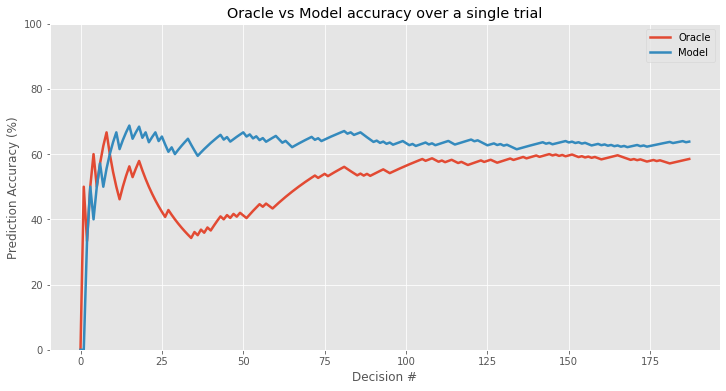

In [9]:
def plot_trial_accuracies(trial, window_size, model_name):
    results = oracle(window_size, logging=False)
    o_accuracies = results[window_size][trial]['accuracies']

    results = inference(model_name, logging=False)
    m_accuracies = results[model_name][trial]['accuracies']
    
    # trim m_accuracies to account for window_size
    m_accuracies = m_accuracies[:-window_size]

    plt.figure(figsize=(12, 6))

    plt.plot(o_accuracies, label='Oracle', lw=2.5)
    plt.plot(m_accuracies, label='Model', lw=2.5)
    plt.title('Oracle vs Model accuracy over a single trial')
    plt.xlabel('Decision (#)')
    plt.ylabel('Prediction Accuracy (%)')
    plt.ylim(0, 100)
    plt.legend()
    plt.show()

plot_trial_accuracies(1, 5, '0523-1537')

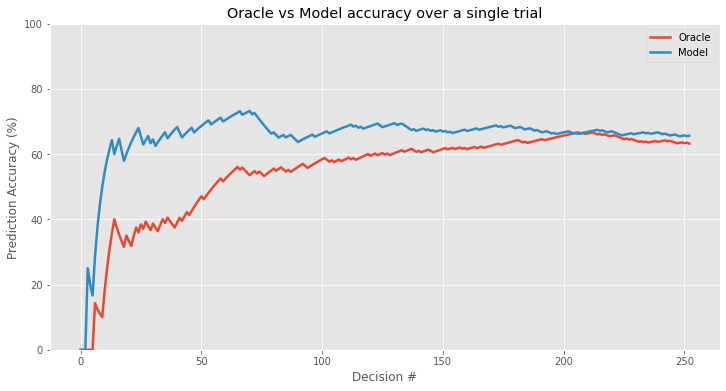

In [10]:
plot_trial_accuracies(2, 5, '0523-1537')

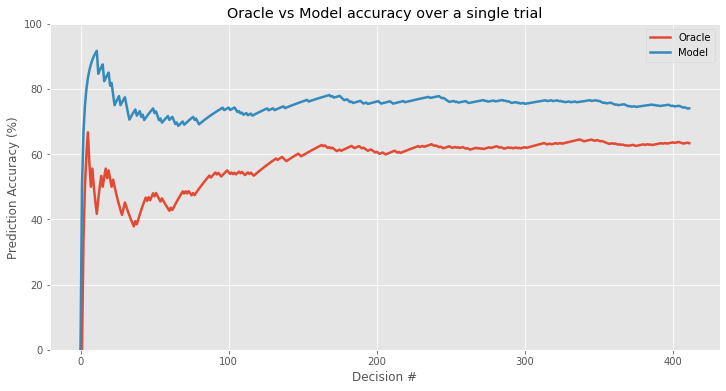

In [11]:
plot_trial_accuracies(5, 5, '0523-1537')

### Diagrams

In [9]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='LSTM Models')

# Variable Length Segments
with dot.subgraph(name='cluster_0') as c:
    c.attr(style='filled', color='lightgrey')
    c.node_attr.update(style='filled', color='white')
    c.attr(label='Variable Length Segments')

    c.node('Seq', 'Sequence')
    c.node('1', '1')
    c.node('12', '12')
    c.node('123', '123')
    c.node('1234', '1234')

    c.edges([('Seq', '1'), ('1', '12'), ('12', '123'), ('123', '1234')])

# Fixed Length Segments
with dot.subgraph(name='cluster_1') as c:
    c.attr(style='filled', color='lightblue')
    c.node_attr.update(style='filled', color='white')
    c.attr(label='Fixed Length Segments')

    c.node('Seq2', 'Sequence')
    c.node('123', '123')
    c.node('234', '234')
    c.node('345', '345')

    c.edges([('Seq2', '123'), ('123', '234'), ('234', '345')])

# Connect the two models
dot.edge('Seq', 'Seq2', label='Sequence Input')

# Render the graph
dot.render('lstm_models', format='png', view=True)

'lstm_models.png'